In [40]:
pip install yfinance


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install plotly.express 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install pandas_datareader


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas as pd



In [44]:

import yfinance as yf
df = yf.download('DMART.NS', start='2015-1-1', end='2022-12-31')
df.head()

C:\Users\Phoenix\AppData\Local\Temp\ipykernel_16716\3400501544.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('DMART.NS', start='2015-1-1', end='2022-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DMART.NS,DMART.NS,DMART.NS,DMART.NS,DMART.NS
Date,,,,,
2017-03-21,641.599976,648.900024,558.299988,600.000000,85728445
2017-03-22,638.549988,657.450012,625.099976,641.549988,15817671
2017-03-23,634.849976,648.000000,628.150024,637.900024,4690121
2017-03-24,616.900024,640.450012,612.599976,635.450012,4865013
2017-03-27,614.400024,623.000000,602.349976,615.000000,3535098


In [45]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,DMART.NS,DMART.NS,DMART.NS,DMART.NS,DMART.NS
0,2017-03-21,641.599976,648.900024,558.299988,600.000000,85728445
1,2017-03-22,638.549988,657.450012,625.099976,641.549988,15817671
2,2017-03-23,634.849976,648.000000,628.150024,637.900024,4690121
3,2017-03-24,616.900024,640.450012,612.599976,635.450012,4865013
4,2017-03-27,614.400024,623.000000,602.349976,615.000000,3535098


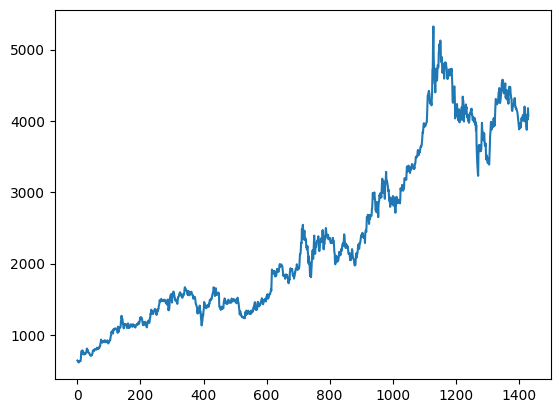

In [46]:
plt.plot(df.Close)

In [47]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,DMART.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1426,4234.431516
1427,4232.101018
1428,4229.687517
1429,4228.939016


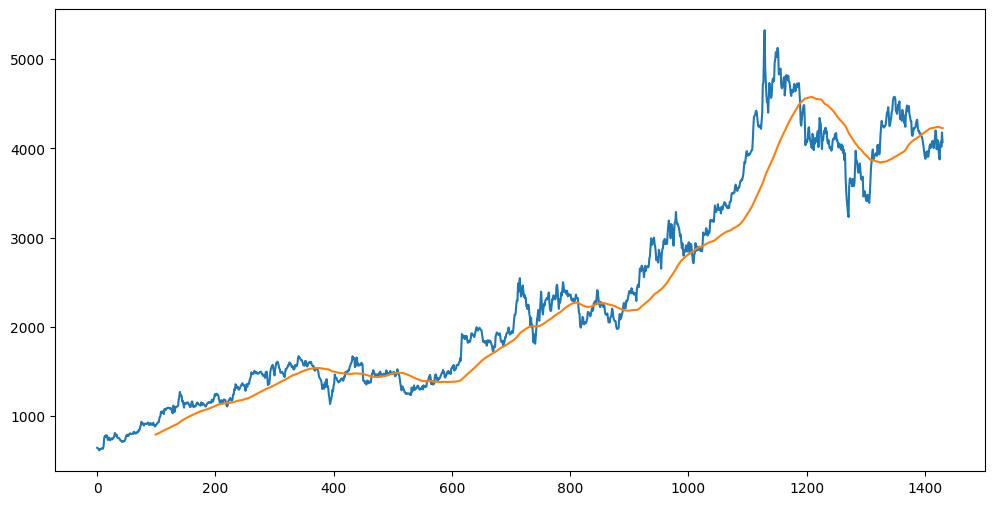

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [49]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,DMART.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1426,4039.121764
1427,4038.874764
1428,4038.480013
1429,4038.528512


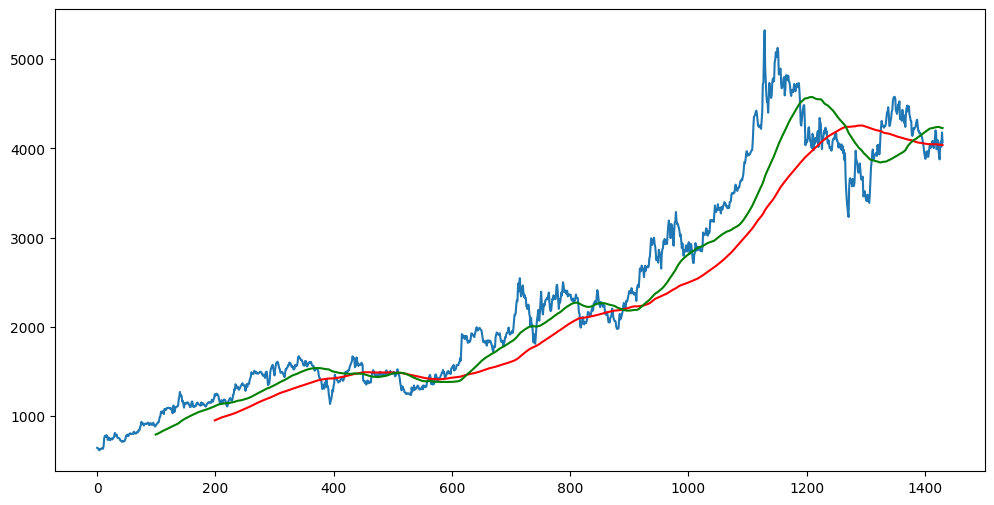

In [50]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')

In [51]:
df.shape

(1431, 6)

In [52]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*.80)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*.20):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1144, 1)
(1145, 1)


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [54]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00577573],
       [0.00512809],
       [0.00434241],
       ...,
       [0.84568991],
       [0.87632047],
       [0.88532392]], shape=(1144, 1))

In [55]:
data_training.shape

(1144, 1)

In [56]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [57]:
x_train.shape

(1044, 100, 1)

In [58]:
pip install keras.layers

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [60]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(units=1))


c:\Users\Phoenix\Desktop\yamini\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 150)       │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 200)       │       280,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 250)            │       451,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 525ms/step - loss: 0.0253
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 512ms/step - loss: 0.0112
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 495ms/step - loss: 0.0052
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 499ms/step - loss: 0.0047
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 493ms/step - loss: 0.0052
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 507ms/step - loss: 0.0043
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 492ms/step - loss: 0.0040
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - loss: 0.0050
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 491ms/step - loss: 0.0038
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 500ms/step - loss: 0.0040
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 506ms/step - loss: 0.0032
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 500ms/step - loss: 0.0035
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 524ms/step - loss: 0.0037
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 507ms/step - loss: 0.0036
Epoch 15/100
33/33 ━━━━━━━━━━

In [ ]:
model.save('keras_model.h5')